In [13]:
import Quandl
import pandas as pd
import math
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pickle
from statistics import mean
import random

% matplotlib inline

In [4]:
df = Quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']*100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [5]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))  # find the the projected number of days to predict in the future
df['label'] = df[forecast_col].shift(-forecast_out)

In [6]:
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

In [7]:
X = np.array(df.drop(['label'], 1)) # features
X = preprocessing.scale(X) # need to scale X before feed it to classifier. Need to scale alongside other valuesnp

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label']) # label
y = np.array(df['label'])

C:\Users\Riley\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [8]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
# clf = LinearRegression(n_jobs=-1)

In [11]:
# clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [9]:
# with open('linearregression.pickle', 'wb') as f: 
#     pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [10]:
confidence = clf.score(X_test, y_test)
print(confidence)

0.964486483867


In [11]:
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

[ 734.8651951   732.73221461  734.74598633  734.37542185  725.98299679
  705.11151099  707.43025154  710.76226872  713.46524482  717.02248223
  683.3464645   684.12448024  694.45014992  697.25646785  704.6967128
  712.03747081  707.539118    709.68162426  710.57044503  719.6216265
  728.36423317  734.51049034  732.06169487  738.30002554  737.87636459
  752.29712064  754.3650021   758.12713569  756.47060907  761.29419241] 0.964486483867 30


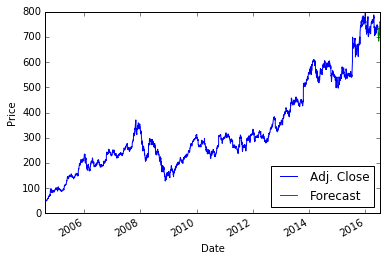

In [16]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
    

In [18]:
xs = np.array(list(range(10)))
ys = np.abs(np.array(list(range(10))) + np.random.randn(10))

In [19]:
xs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
ys

array([ 0.46143035,  0.10182795,  1.51174448,  0.93461582,  4.04955336,
        5.9355703 ,  6.06343468,  6.76007239,  8.21840785,  7.57328651])

In [42]:
def best_fit_slope_and_intercept(xs, ys):
    m = ( (np.mean(xs)*np.mean(ys)) - (np.mean(xs*ys)) ) / ( (np.mean(xs))**2 - np.mean(xs**2) )
    b = mean(ys) - m*np.mean(xs)
    return m, b

In [43]:
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x) + b for x in xs]
predict_x = 10
predict_y = (m*predict_x)+b

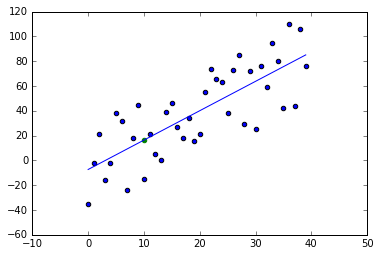

In [44]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)

In [27]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [28]:
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr) / (squared_error_y_mean)

In [45]:
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

0.60990065549077677

In [38]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs), np.array(ys)

In [39]:
xs, ys = create_dataset(40, 40, 2, correlation='pos')